In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

***Creating the Dataframes that will be used for the Notebook***

In [5]:
teis_df=pd.read_excel('../data/bdi3_all_evals.xlsx')

In [6]:
teis_df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50


In [7]:
teis_df.describe()

,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive T-Score,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional T-Score,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication T-Score,Motor Sum of Scaled Scores,...,Cognitive-Attention and Memory CSS,Cognitive-Attention and Memory T-Score,Cognitive-Reasoning / Academic Skills RS,Cognitive-Reasoning / Academic Skills SS,Cognitive-Reasoning / Academic Skills CSS,Cognitive-Reasoning / Academic Skills T-Score,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts T-Score
count,23939.000000,23939.000000,23939.000000,23927.000000,23927.000000,23927.000000,23912.000000,23912.000000,23912.000000,23912.000000,...,23929.000000,23929.000000,13133.000000,13133.000000,13133.000000,13133.000000,23927.000000,23927.000000,23927.000000,23927.000000
mean,11.728268,86.988304,41.326204,22.773770,94.293601,46.197476,13.020241,79.060723,36.040482,22.871654,...,464.361779,44.386895,9.062362,8.074317,483.520597,43.550217,10.703055,7.619133,427.847285,42.066160
std,6.001474,17.689509,11.782294,7.700521,16.819322,11.215540,6.805753,20.417259,13.611506,8.297234,...,31.259778,9.104941,4.331208,3.241116,14.595348,10.781467,4.343488,3.284079,43.391966,10.955928
min,1.000000,46.000000,14.000000,2.000000,46.000000,14.000000,2.000000,46.000000,14.000000,2.000000,...,366.000000,20.000000,0.000000,1.000000,442.000000,20.000000,0.000000,1.000000,283.000000,20.000000
25%,7.000000,76.000000,34.000000,17.000000,84.000000,39.000000,8.000000,64.000000,26.000000,17.000000,...,455.000000,40.000000,6.000000,6.000000,475.000000,37.000000,8.000000,6.000000,395.000000,37.000000
50%,11.000000,88.000000,42.000000,22.000000,94.000000,46.000000,13.000000,79.000000,36.000000,23.000000,...,472.000000,47.000000,9.000000,8.000000,485.000000,43.000000,10.000000,8.000000,426.000000,43.000000
75%,16.000000,100.000000,50.000000,28.000000,106.000000,54.000000,18.000000,94.000000,46.000000,29.000000,...,485.000000,50.000000,12.000000,11.000000,493.000000,53.000000,13.000000,10.000000,464.000000,50.000000
max,36.000000,148.000000,82.000000,53.000000,154.000000,86.000000,38.000000,154.000000,86.000000,50.000000,...,544.000000,80.000000,30.000000,19.000000,543.000000,80.000000,48.000000,19.000000,554.000000,80.000000


In [8]:
#teis_df=teis_df.drop_duplicates()
teis_df=teis_df.drop_duplicates(subset=teis_df.columns.difference(['Child ID']))
teis_df.reset_index()
teis_df= teis_df.rename(columns={'Location - Sub Level 1':'Location'})

In [9]:
#data type checking cell:
type(teis_df['Adaptive RDI'][2])

str

***Cleaning the main dataframe: teis_df***

In [10]:
teis_df

,Child ID,Gender,Date of Birth,Location,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [11]:
teis_df.tail(3297)

#no_ids=teis_df.tail(3291)
#no_ids

,Child ID,Gender,Date of Birth,Location,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
19801,565456,M,2023-09-23,Northwest,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,4.0,12.0,75,2,97/90,352.0,323 - 381,0.67,57.0,64
19802,565457,M,2023-08-08,East Tennessee,BDI-3 Eligibility Evaluation,9.0,95.0,37,86-106,77/90,...,3.0,7.0,16,0,32/90,331.0,311 - 350,– 1.00,40.0,29
19804,565460,M,2021-10-26,Memphis Delta,BDI-3 Eligibility Evaluation,20.0,100.0,50,93-107,92/90,...,12.0,8.0,25,22,66/90,451.0,429 - 473,– 0.67,43.0,36
19805,565461,F,2022-04-08,Greater Nashville,BDI-3 Eligibility Evaluation,11.0,105.0,63,94-114,95/90,...,12.0,12.0,75,22,97/90,451.0,429 - 473,0.67,57.0,64
19806,565463,M,2021-11-30,Greater Nashville,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,16.0,14.0,91,31,99/90,482.0,471 - 493,1.33,63.0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [12]:
counts=teis_df.groupby('Location')['Child ID'].count().reset_index()
counts

,Location,Child ID
0,East Tennessee,3021
1,First Tennessee,1561
2,Greater Nashville,3406
3,Memphis Delta,2650
4,Northwest,938
5,South Central,2553
6,Southeast Tennessee,1488
7,Southwest,1075
8,Upper Cumberland,1947


In [13]:
level_counts = teis_df.groupby('Program Label')['Child ID'].count()
level_counts

Program Label
BDI-3 Annual Evaluation                6133
BDI-3 Eligibility Evaluation          12375
BDI-3 Milestone or Exit Evaluation      200
Name: Child ID, dtype: int64

In [14]:
domain_df= teis_df[['Child ID', 'Gender', 'Adaptive Developmental Quotient', 'Social-Emotional Developmental Quotient', 'Communication Developmental Quotient', 'Motor Developmental Quotient', 'Cognitive Developmental Quotient']]
domain_df

,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
0,44879,F,85.0,127.0,91.0,88.0,100.0
1,47795,F,88.0,104.0,97.0,102.0,100.0
2,54340,M,90.0,91.0,82.0,109.0,83.0
3,54344,F,115.0,103.0,88.0,91.0,113.0
4,54515,M,75.0,73.0,70.0,73.0,97.0
...,...,...,...,...,...,...,...
23942,SP03287,F,115.0,115.0,112.0,118.0,113.0
23943,SP03288,F,115.0,116.0,112.0,117.0,122.0
23944,SP03289,F,103.0,102.0,55.0,104.0,98.0
23945,SP03290,M,88.0,90.0,76.0,100.0,88.0


Text(0.5, 1.0, 'Cognitive')

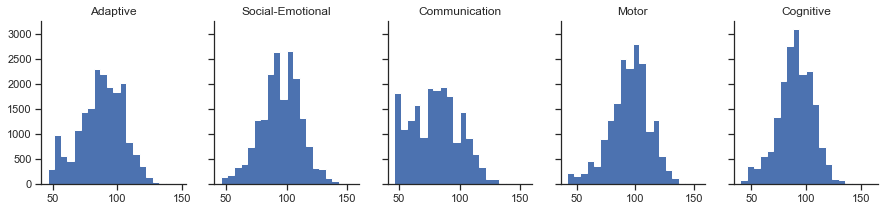

In [15]:
n_bins=20
fig, axs = plt.subplots(1, 5, sharey=True,figsize=(15,3))

axs[0].hist(domain_df['Adaptive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[0].set_title('Adaptive')
axs[1].hist(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[1].set_title('Social-Emotional')
axs[2].hist(domain_df['Communication Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[2].set_title('Communication')
axs[3].hist(domain_df['Motor Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[3].set_title('Motor')
axs[4].hist(domain_df['Cognitive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[4].set_title('Cognitive')



u_gender=domain_df.loc[domain_df['Gender']=='U']
u_gender

****Gathering Averages for each column****

In [16]:
adaptive_avg = domain_df.groupby('Gender')['Adaptive Developmental Quotient'].agg(np.mean).to_frame()
adaptive_avg


,Adaptive Developmental Quotient
Gender,
F,89.431736
M,86.485295
U,89.752577


In [17]:
social_avg = domain_df.groupby('Gender')['Social-Emotional Developmental Quotient'].agg(np.mean).to_frame()
social_avg

,Social-Emotional Developmental Quotient
Gender,
F,96.460420
M,93.518464
U,92.845361


In [18]:
#pulling two averaged columns into a shared data frame to build off of
average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient
Gender,,
F,89.431736,96.460420
M,86.485295,93.518464
U,89.752577,92.845361


****Averaging the rest of the columns****

In [19]:
comm_avg = domain_df.groupby('Gender')['Communication Developmental Quotient'].agg(np.mean).to_frame()
comm_avg

,Communication Developmental Quotient
Gender,
F,82.894987
M,77.603127
U,84.649485


In [20]:
motor_avg = domain_df.groupby('Gender')['Motor Developmental Quotient'].agg(np.mean).to_frame()
motor_avg

,Motor Developmental Quotient
Gender,
F,95.217836
M,94.210393
U,98.927835


In [21]:
cog_avg = domain_df.groupby('Gender')['Cognitive Developmental Quotient'].agg(np.mean).to_frame()
cog_avg

,Cognitive Developmental Quotient
Gender,
F,90.740751
M,88.092378
U,94.560137


sns.catplot(x="Gender", y="Cognitive Developmental Quotient",
                  hue="Gender", 
                  data=cog_avg, kind="bar",
                height=4, aspect=.7);

average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df

average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df

****Merging the averaged columns into 1 dataframe****

In [22]:
average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df= average_df.merge(motor_avg, how='outer', on='Gender')
average_df= average_df.merge(cog_avg, how='outer', on='Gender')
#average_df.rename(columns = {'Gender' : 'Domain'}, inplace=True)
average_df.reset_index()
average_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
Gender,,,,,
F,89.431736,96.460420,82.894987,95.217836,90.740751
M,86.485295,93.518464,77.603127,94.210393,88.092378
U,89.752577,92.845361,84.649485,98.927835,94.560137


In [23]:
Domain = ['F', 'M', 'U']

In [24]:
average_df.loc[:, "Domain"] = Domain

In [25]:
average_df = average_df[['Domain', 'Adaptive Developmental Quotient', 'Social-Emotional Developmental Quotient', 'Communication Developmental Quotient', 'Motor Developmental Quotient', 'Cognitive Developmental Quotient']]
#average_df.reset_index(inplace=True)
average_df

,Domain,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
Gender,,,,,,
F,F,89.431736,96.460420,82.894987,95.217836,90.740751
M,M,86.485295,93.518464,77.603127,94.210393,88.092378
U,U,89.752577,92.845361,84.649485,98.927835,94.560137


In [26]:
average_df_flip = average_df.transpose()
average_df_flip

Gender,F,M,U
Domain,F,M,U
Adaptive Developmental Quotient,89.431736,86.485295,89.752577
Social-Emotional Developmental Quotient,96.46042,93.518464,92.845361
Communication Developmental Quotient,82.894987,77.603127,84.649485
Motor Developmental Quotient,95.217836,94.210393,98.927835
Cognitive Developmental Quotient,90.740751,88.092378,94.560137


In [27]:
average_df_flip= average_df_flip.columns.str.replace('Gender', 'Domain')
average_df_flip

Index(['F', 'M', 'U'], dtype='object', name='Gender')

In [62]:
fmu_dict= {
    'F' : '#1A3D66',
    'M' : '#4482CA',
    'U' : '#A7CBF1'
}
#pal = sns.dark_palette("#1A3D66", reverse=True, as_cmap=True)

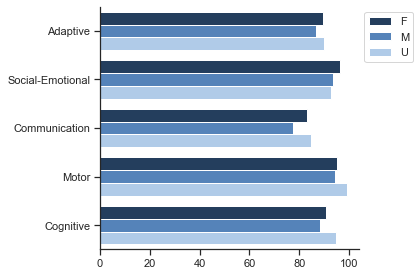

In [65]:
# sns.barplot(data=average_df)

#plt.savefig('tripsbyday.png')

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


g = sns.barplot(
    data=average_df.melt(
        id_vars = ["Domain"], 
        value_vars=["Adaptive Developmental Quotient", "Social-Emotional Developmental Quotient", "Communication Developmental Quotient", 'Motor Developmental Quotient', 'Cognitive Developmental Quotient' ]),
    y="variable", 
    x="value", 
    hue="Domain", 
    ci=None, 
    palette = fmu_dict
    )
#plt.title('Average DQ of Domains by Gender')
g.set(xlabel=None)
g.set(ylabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1), title=None)
g.set_yticklabels(('Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive'))
;
plt.tight_layout()
plt.savefig('Avg_DQ_gender', dpi=300)



***Adaptive Sub Domain df***

In [30]:
adaptive_sub_df=teis_df[['Child ID','Gender', 'Adaptive-Self Care SS','Adaptive-Personal Responsibility SS']]
#adaptive_sub_df.fillna("N/A",inplace=True)
adaptive_sub_df

,Child ID,Gender,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS
0,44879,F,7.0,NaN
1,47795,F,7.0,9.0
2,54340,M,8.0,NaN
3,54344,F,13.0,NaN
4,54515,M,5.0,NaN
...,...,...,...,...
23942,SP03287,F,13.0,NaN
23943,SP03288,F,10.0,15.0
23944,SP03289,F,10.0,11.0
23945,SP03290,M,6.0,10.0


****Gathering the averages for the sub-domain****

In [31]:
adapt_selfcare_avg = adaptive_sub_df.groupby('Gender')['Adaptive-Self Care SS'].agg(np.mean).to_frame()
adapt_selfcare_avg

,Adaptive-Self Care SS
Gender,
F,7.838872
M,7.256195
U,7.683849


In [32]:
adapt_pr_avg = adaptive_sub_df.groupby('Gender')['Adaptive-Personal Responsibility SS'].agg(np.mean).to_frame()
adapt_pr_avg

,Adaptive-Personal Responsibility SS
Gender,
F,8.290740
M,7.856830
U,8.980645


***Adding them together***

In [33]:
adapt_sub_avg= adapt_selfcare_avg.merge(adapt_pr_avg, how='outer', on='Gender')
adapt_sub_avg

,Adaptive-Self Care SS,Adaptive-Personal Responsibility SS
Gender,,
F,7.838872,8.290740
M,7.256195,7.856830
U,7.683849,8.980645


***Social Emotional***

In [34]:
se_sub_df=teis_df[['Child ID','Gender', 'Social Emotional-Adult Interaction SS','Social Emotional-Peer Interaction SS','Social Emotional-Self Concept / Social Role SS']]
#se_sub_df.fillna("N/A",inplace=True)
se_sub_df

se_adult_avg = se_sub_df.groupby('Gender')['Social Emotional-Adult Interaction SS'].agg(np.mean).to_frame()
se_adult_avg

se_peer_avg = se_sub_df.groupby('Gender')['Social Emotional-Peer Interaction SS'].agg(np.mean).to_frame()
se_peer_avg

se_self_social_avg = se_sub_df.groupby('Gender')['Social Emotional-Self Concept / Social Role SS'].agg(np.mean).to_frame()
se_self_social_avg

,Social Emotional-Self Concept / Social Role SS
Gender,
F,8.489135
M,7.814437
U,7.577320


**Adding Them Together - Social-Emotional**

In [35]:
adapt_sub_avg= adapt_selfcare_avg.merge(adapt_pr_avg, how='outer', on='Gender')
adapt_sub_avg

se_sub_avg= se_adult_avg.merge(se_peer_avg, how = 'outer', on='Gender')
se_sub_avg

se_sub_avg2= se_sub_avg.merge(se_self_social_avg, how = 'outer', on='Gender')
se_sub_avg2

,Social Emotional-Adult Interaction SS,Social Emotional-Peer Interaction SS,Social Emotional-Self Concept / Social Role SS
Gender,,,
F,10.593898,8.179615,8.489135
M,10.365564,7.718108,7.814437
U,10.639175,7.464516,7.577320


***Adding the Examiner Column to investigate trends later on***

In [36]:
domain_df['Examiner']=teis_df['Adaptive-Self Care Examiner']
domain_df

C:\Users\tkwhi\AppData\Local\Temp/ipykernel_26820/998188400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_df['Examiner']=teis_df['Adaptive-Self Care Examiner']


,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,Examiner
0,44879,F,85.0,127.0,91.0,88.0,100.0,Kelly Bryan
1,47795,F,88.0,104.0,97.0,102.0,100.0,Patti Lyle
2,54340,M,90.0,91.0,82.0,109.0,83.0,Karen McMillion
3,54344,F,115.0,103.0,88.0,91.0,113.0,Jennifer Vines
4,54515,M,75.0,73.0,70.0,73.0,97.0,Ally Simmons
...,...,...,...,...,...,...,...,...
23942,SP03287,F,115.0,115.0,112.0,118.0,113.0,Rachel Anderson
23943,SP03288,F,115.0,116.0,112.0,117.0,122.0,Joanna Jones
23944,SP03289,F,103.0,102.0,55.0,104.0,98.0,Joanna Jones
23945,SP03290,M,88.0,90.0,76.0,100.0,88.0,Lauryn Hartness


Text(0.5, 1.0, 'Cognitive')

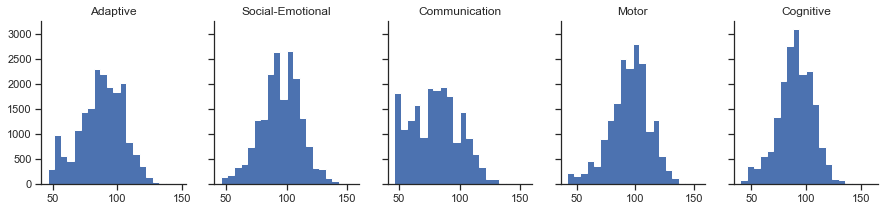

In [37]:
n_bins=20
fig, axs = plt.subplots(1, 5, sharey=True,figsize=(15,3))

axs[0].hist(domain_df['Adaptive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[0].set_title('Adaptive')
axs[1].hist(domain_df['Social-Emotional Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[1].set_title('Social-Emotional')
axs[2].hist(domain_df['Communication Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[2].set_title('Communication')
axs[3].hist(domain_df['Motor Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[3].set_title('Motor')
axs[4].hist(domain_df['Cognitive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[4].set_title('Cognitive')

***Counting the number of Evaluations by Examiner***

In [38]:
examiner_df=teis_df.groupby('Adaptive-Self Care Examiner')['Child ID'].count().sort_values(ascending=False).reset_index(name='Number of Evals')

examiner_df['Examiner']=examiner_df['Adaptive-Self Care Examiner']
examiner_df

#examiner_df_max=examiner_df[examiner_df['Number of Evals'] == examiner_df['Number of Evals'].max()]
#print(examiner_df_max)
#examiner_df_min=examiner_df[examiner_df['Number of Evals'] == examiner_df['Number of Evals'].min()]
#print(examiner_df_min)

,Adaptive-Self Care Examiner,Number of Evals,Examiner
0,Tracey Hardiman,415,Tracey Hardiman
1,Emily Williams,373,Emily Williams
2,Kelly Bryan,371,Kelly Bryan
3,Tara Herrell,367,Tara Herrell
4,Candice Padilla,362,Candice Padilla
...,...,...,...
100,Karie Quick,2,Karie Quick
101,Amanda Harris,2,Amanda Harris
102,Sara Turner,2,Sara Turner
103,Bonnie Jones,1,Bonnie Jones


***Getting Average Score for each examiner in each domain and merging it into one dataframe***

In [39]:
examiner_adapt_avg= domain_df.groupby('Examiner')['Adaptive Developmental Quotient'].agg(np.mean).to_frame()
examiner_social_avg=domain_df.groupby('Examiner')['Social-Emotional Developmental Quotient'].agg(np.mean).to_frame()
examiner_comm_avg=domain_df.groupby('Examiner')['Communication Developmental Quotient'].agg(np.mean).to_frame()
examiner_motor_avg=domain_df.groupby('Examiner')['Motor Developmental Quotient'].agg(np.mean).to_frame()
examiner_cog_avg=domain_df.groupby('Examiner')['Cognitive Developmental Quotient'].agg(np.mean).to_frame()

In [40]:
examiner_avg_df=examiner_adapt_avg.merge(examiner_social_avg, how='outer', on='Examiner')
examiner_avg_df=examiner_avg_df.merge(examiner_comm_avg, how='outer', on='Examiner')
examiner_avg_df=examiner_avg_df.merge(examiner_motor_avg, how='outer', on='Examiner')
examiner_avg_df=examiner_avg_df.merge(examiner_cog_avg, how='outer', on='Examiner')


examiner_avg_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
Examiner,,,,,
Abby Spence,95.728125,105.178125,84.634375,102.275000,94.828125
Alexis Linville,88.031339,91.168091,79.153846,96.931624,91.592593
Alice Starnes,87.382812,93.675781,79.647059,94.141732,87.769531
Allison Coontz,83.643777,97.064378,76.849785,88.257511,85.081545
Ally Simmons,84.757475,90.056478,80.973422,92.840532,90.857143
...,...,...,...,...,...
Tiffany Maynard,87.527211,94.540816,80.163265,93.547619,83.574830
Tiffany Treadway,76.929487,74.442308,71.903846,91.115385,82.333333
Toni London,83.734483,88.682759,77.448276,90.789655,87.668966


***Adding the counts to the averages for one grand dataframe***

In [41]:
examiner_grand_df=examiner_avg_df.merge(examiner_df, how='inner', on='Examiner').drop(labels='Adaptive-Self Care Examiner', axis='columns')
examiner_grand_df.sort_values('Number of Evals',ascending=False)

,Examiner,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,Number of Evals
103,Tracey Hardiman,87.108434,98.531401,81.437956,96.645477,97.429612,415
35,Emily Williams,89.506702,105.774799,81.903485,101.166220,97.619303,373
62,Kelly Bryan,93.560647,104.690027,83.576819,101.552561,92.819407,371
97,Tara Herrell,89.727520,99.820163,81.722071,95.073973,90.027248,367
19,Candice Padilla,89.762431,93.906077,80.450276,94.928177,90.801105,362
...,...,...,...,...,...,...,...
54,Karie Quick,80.000000,122.500000,121.000000,113.500000,133.500000,2
5,Amanda Harris,95.000000,80.500000,64.000000,110.500000,93.500000,2
93,Sara Turner,85.500000,72.500000,55.000000,82.000000,76.500000,2
18,Bonnie Jones,60.000000,115.000000,70.000000,85.000000,107.000000,1


(array([12.,  9.,  3.,  4.,  5.,  6.,  7.,  7.,  1.,  4.,  3.,  8.,  7.,
         7.,  7.,  4.,  5.,  5.,  0.,  1.]),
 array([  1. ,  21.7,  42.4,  63.1,  83.8, 104.5, 125.2, 145.9, 166.6,
        187.3, 208. , 228.7, 249.4, 270.1, 290.8, 311.5, 332.2, 352.9,
        373.6, 394.3, 415. ]),
 <BarContainer object of 20 artists>)

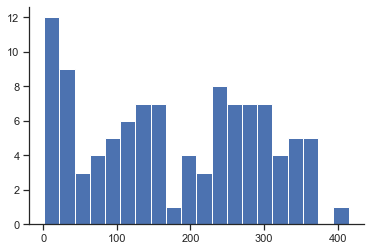

In [42]:
plt.hist(x=examiner_grand_df['Number of Evals'], bins=20)

Text(0.5, 1.0, 'Cognitive')

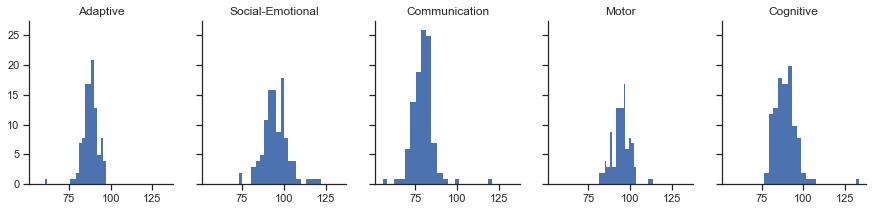

In [43]:
n_bins=20
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True,figsize=(15,3))

axs[0].hist(examiner_grand_df['Adaptive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[0].set_title('Adaptive')
axs[1].hist(examiner_grand_df['Social-Emotional Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[1].set_title('Social-Emotional')
axs[2].hist(examiner_grand_df['Communication Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[2].set_title('Communication')
axs[3].hist(examiner_grand_df['Motor Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[3].set_title('Motor')
axs[4].hist(examiner_grand_df['Cognitive Developmental Quotient'], bins=n_bins, histtype='stepfilled')
axs[4].set_title('Cognitive')



In [44]:
sns.scatterplot(examiner_grand_df, x='Adaptive Developmental Quotient', y='Number of Evals')

c:\Users\tkwhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Number of Evals` for parameter `y`

In [ ]:
sns.scatterplot(examiner_grand_df, x='Social-Emotional Developmental Quotient', y='Number of Evals')

In [ ]:
sns.scatterplot(examiner_grand_df, x='Communication Developmental Quotient', y='Number of Evals')

In [ ]:
sns.scatterplot(examiner_grand_df, x='Motor Developmental Quotient', y='Number of Evals')

In [ ]:
sns.scatterplot(examiner_grand_df, x='Cognitive Developmental Quotient', y='Number of Evals')

In [ ]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True,figsize=(15,3))

axs[0].scatter(x= examiner_grand_df['Adaptive Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[0].set_title('Adaptive')
axs[1].scatter(examiner_grand_df['Social-Emotional Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[1].set_title('Social-Emotional')
axs[2].scatter(examiner_grand_df['Communication Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[2].set_title('Communication')
axs[3].scatter(examiner_grand_df['Motor Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[3].set_title('Motor')
axs[4].scatter(examiner_grand_df['Cognitive Developmental Quotient'], y=examiner_grand_df['Number of Evals'])
axs[4].set_title('Cognitive')

***Some preliminary eda for created dataframes***

In [ ]:
examiner_avg_df.describe()

In [ ]:
avg_per_domain = domain_df.describe().reset_index()
avg_per_domain

In [ ]:
low_cog=examiner_avg_df['Cognitive Developmental Quotient'].sort_values(ascending=True).head(105)
low_cog

In [ ]:
examiner_adapt_count= domain_df.groupby('Examiner')['Adaptive Developmental Quotient'].count().to_frame()
examiner_adapt_count

In [ ]:
adaptive_examiner_df=teis_df[['Child ID','Gender','Adaptive-Self Care Examiner','Adaptive-Personal Responsibility Examiner','Adaptive-Self Care SS','Adaptive-Personal Responsibility SS']]
adaptive_examiner_df

In [ ]:
selfcare_examiner_scores=adaptive_examiner_df.groupby('Adaptive-Self Care Examiner')['Adaptive-Self Care SS'].agg(np.mean).to_frame().reset_index()
selfcare_examiner_scores

In [ ]:
pr_examiner_scores=adaptive_examiner_df.groupby('Adaptive-Personal Responsibility Examiner')['Adaptive-Personal Responsibility SS'].agg(np.mean).to_frame().reset_index()
pr_examiner_scores